# Train Validation Visualization

This notebook takes a .csv file from a DDNN train log. The .csv file is loaded into pandas dataframe and visualized using seaborn and matplotlib  

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [3]:
df = pd.read_csv('../DDNN/logging/densenet_20191018-092816.csv', index_col=0)
df.head()

,exit-0-train-loss,exit-1-train-loss,exit-2-train-loss,exit-3-train-loss,exit-0-train-accuracy,exit-1-train-accuracy,exit-2-train-accuracy,exit-3-train-accuracy,exit-0-train-time,exit-1-train-time,...,exit-2-test-loss,exit-3-test-loss,exit-0-test-accuracy,exit-1-test-accuracy,exit-2-test-accuracy,exit-3-test-accuracy,exit-0-test-time,exit-1-test-time,exit-2-test-time,exit-3-test-time
0,2.272960,2.249174,2.184296,0.357477,0.148115,0.201170,0.335960,0.897709,10.000230,24.328113,...,1.881425,0.052137,0.184,0.286,0.558,0.994,8.116316,22.407756,47.352125,64.189334
1,2.201177,2.124841,1.605421,0.215694,0.218313,0.291518,0.563048,0.931833,7.996238,22.227986,...,1.056110,0.062527,0.226,0.344,0.700,0.980,7.883194,20.165597,44.533437,59.948144
2,2.128496,1.972509,1.056445,0.192462,0.251137,0.350585,0.682970,0.938902,7.985622,22.150951,...,0.709621,0.098133,0.324,0.432,0.790,0.970,7.012834,20.022922,44.831116,60.769934
3,2.055751,1.809832,0.795307,0.188844,0.287212,0.415340,0.763893,0.939633,8.006276,22.236881,...,0.472019,0.092414,0.348,0.464,0.880,0.966,7.145578,20.040794,43.093734,59.629106
4,1.966247,1.567512,0.600864,0.175485,0.322311,0.500894,0.818167,0.942395,7.943022,22.127223,...,0.357254,0.082730,0.374,0.566,0.914,0.976,7.034631,20.148659,43.575628,58.648088


In [4]:
#palette = sns.color_palette("mako_r", 6)
legend = [
    'exit-0', 
    'exit-1', 
    'exit-2',
    'exit-3'
]
train_loss = [
    df['exit-0-train-loss'], 
    df['exit-1-train-loss'],
    df['exit-2-train-loss'],
    df['exit-3-train-loss']
]
train_acc = [
    df['exit-0-train-accuracy'], 
    df['exit-1-train-accuracy'],
    df['exit-2-train-accuracy'],
    df['exit-3-train-accuracy']
]
test_loss = [
    df['exit-0-test-loss'], 
    df['exit-1-test-loss'],
    df['exit-2-test-loss'],
    df['exit-3-test-loss']
]
test_acc = [
    df['exit-0-test-accuracy'], 
    df['exit-1-test-accuracy'],
    df['exit-2-test-accuracy'],
    df['exit-3-test-accuracy']
]
train_time = [
    df['exit-0-train-time'], 
    df['exit-1-train-time'],
    df['exit-2-train-time'],
    df['exit-3-train-time']
]
test_time = [
    df['exit-0-test-time'], 
    df['exit-1-test-time'],
    df['exit-2-test-time'],
    df['exit-3-test-time']
]

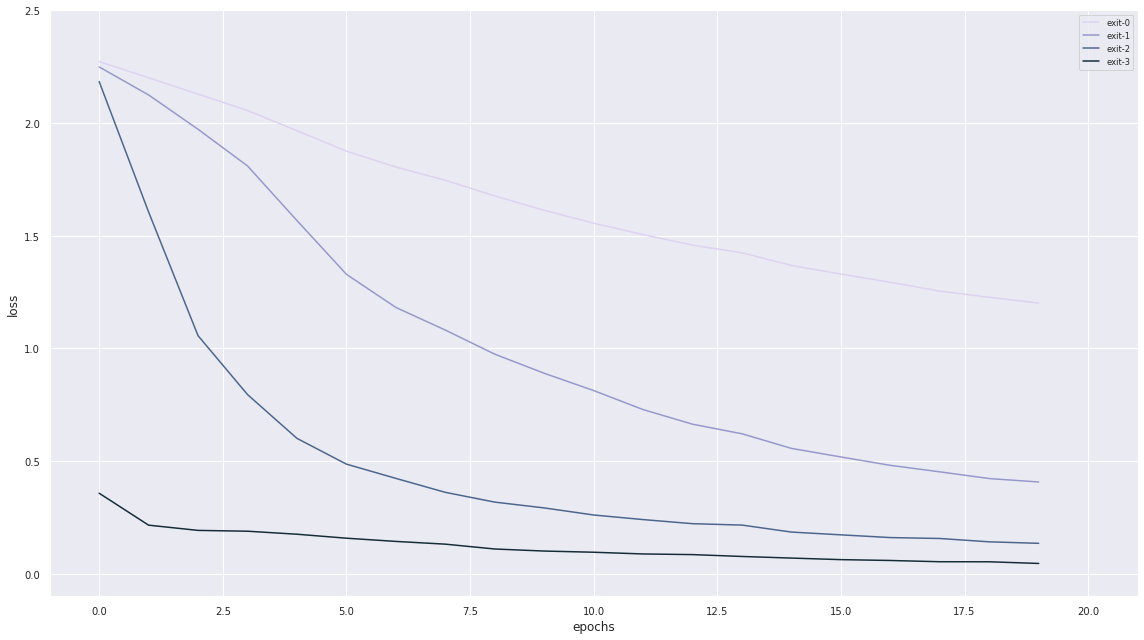

In [7]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=train_loss,
                  palette="ch:2.5,.25", 
                  dashes=False)


#ax.set(xlabel='epochs', ylabel='loss')
plt.xlabel('epochs', fontsize='large')
plt.ylabel('loss', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small')
plt.xlim([-1, 21])
plt.ylim([-0.1, 2.5])
plt.tight_layout()
plt.savefig('BResNet_train_loss_miniimagenet10.png')
plt.show()

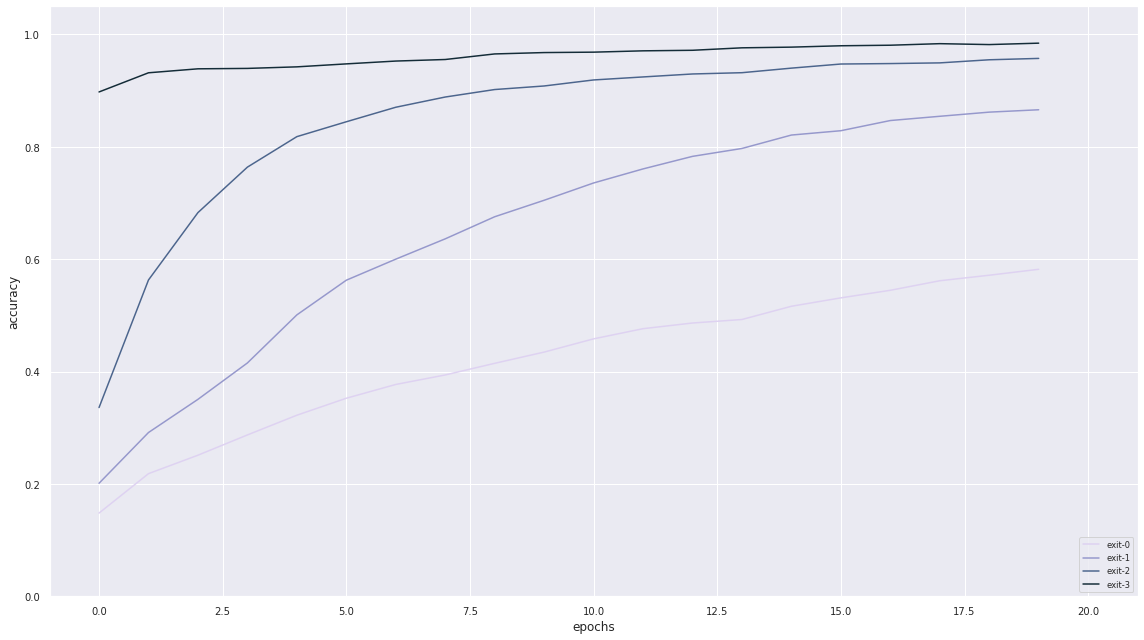

In [8]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=train_acc,
                  palette="ch:2.5,.25", 
                  dashes=False)


plt.xlabel('epochs', fontsize='large')
plt.ylabel('accuracy', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small', loc='lower right')
plt.xlim([-1, 21])
plt.ylim([0, 1.05])
#plt.title('Train accuracy')
plt.tight_layout()
plt.savefig('BResNet_train_acc_miniimagenet10.png')
plt.show()

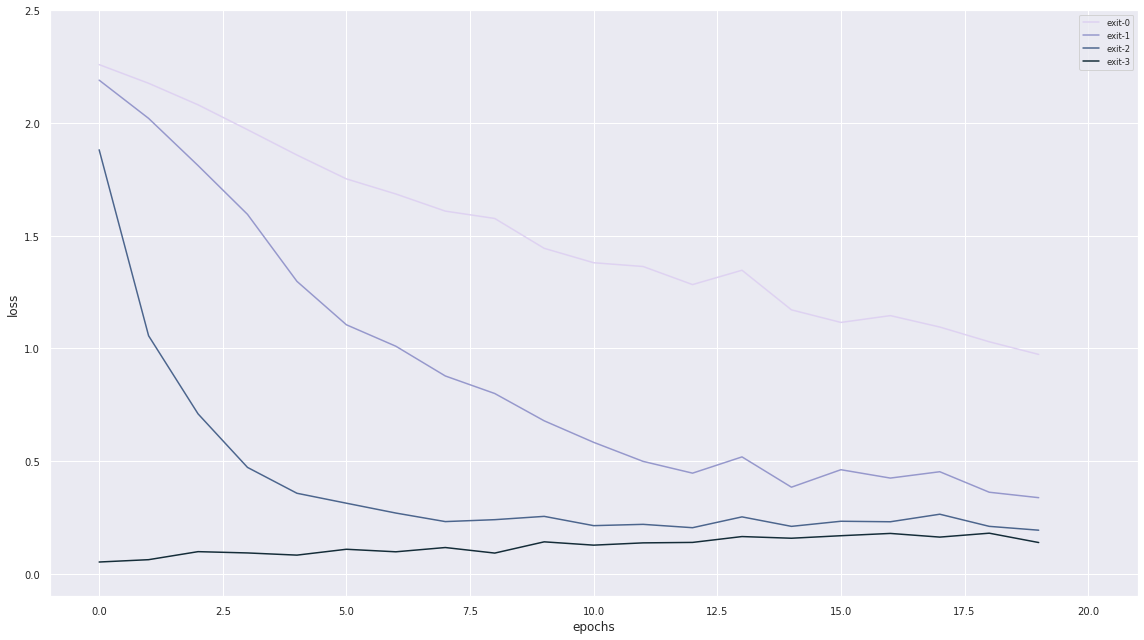

In [10]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=test_loss, 
                  palette="ch:2.5,.25", 
                  dashes=False)


plt.xlabel('epochs', fontsize='large')
plt.ylabel('loss', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small')
plt.xlim([-1, 21])
plt.ylim([-0.1, 2.5])
#plt.title('Test loss')
plt.tight_layout()
plt.savefig('BResNet_test_loss_miniimagenet10.png')
plt.show()

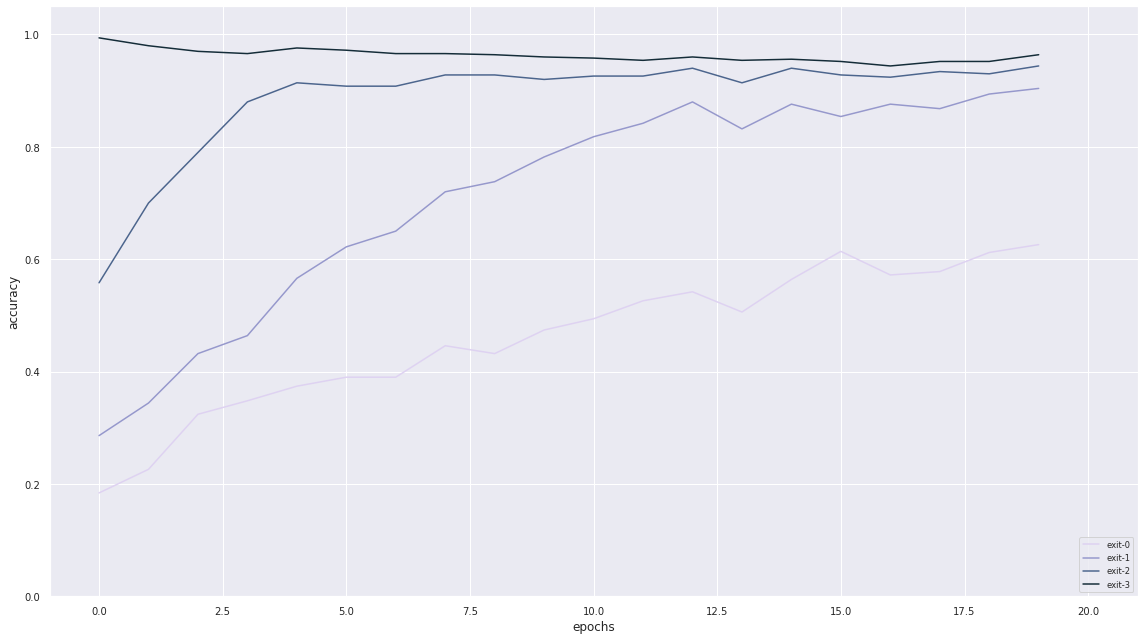

In [12]:
fig = plt.figure(figsize=(16,9))
ax = sns.lineplot(data=test_acc, 
                  palette="ch:2.5,.25", 
                  dashes=False)


plt.xlabel('epochs', fontsize='large')
plt.ylabel('accuracy', fontsize='large')
plt.tick_params(labelsize='medium')
plt.legend(legend, fontsize='small', loc='lower right')
plt.xlim([-1, 21])
plt.ylim([0, 1.05])
#plt.title('Test accuracy')
plt.tight_layout()
plt.savefig('BResNet_test_acc_miniimagenet10.png')
plt.show()

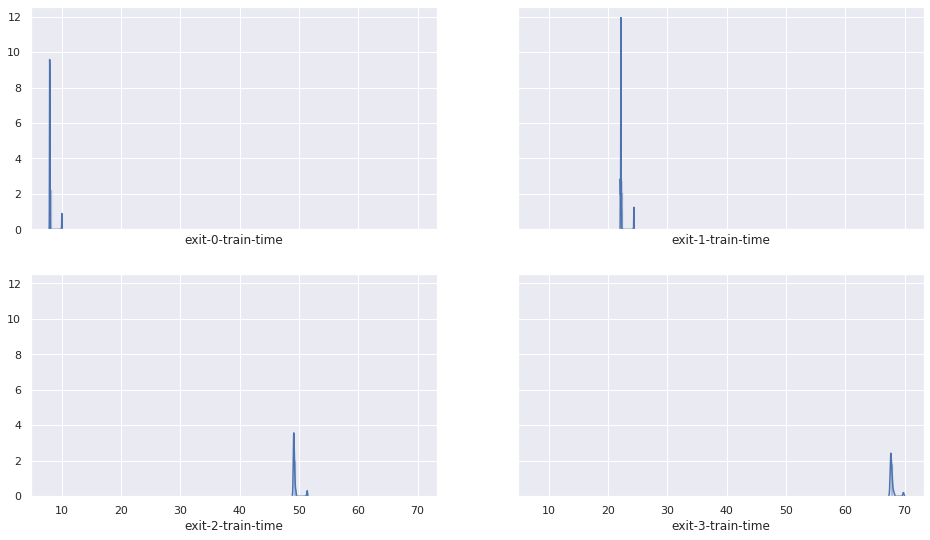

In [13]:
fig, axes = plt.subplots(2,2, figsize=(16,9),     sharex='all',
    sharey='all')
kwargs =  {'kde':True, 'hist': True, 'bins':5}
sns.distplot(train_time[0], ax=axes[0][0], **kwargs)
sns.distplot(train_time[1], ax=axes[0][1], **kwargs)
sns.distplot(train_time[2], ax=axes[1][0], **kwargs)
sns.distplot(train_time[3], ax=axes[1][1], **kwargs)
#sns.distplot(train_time[1])
#ax1 = sns.lineplot(test_time)
#ax.set(xlabel='epochs', ylabel='loss')
#plt.legend(legend)
plt.show()

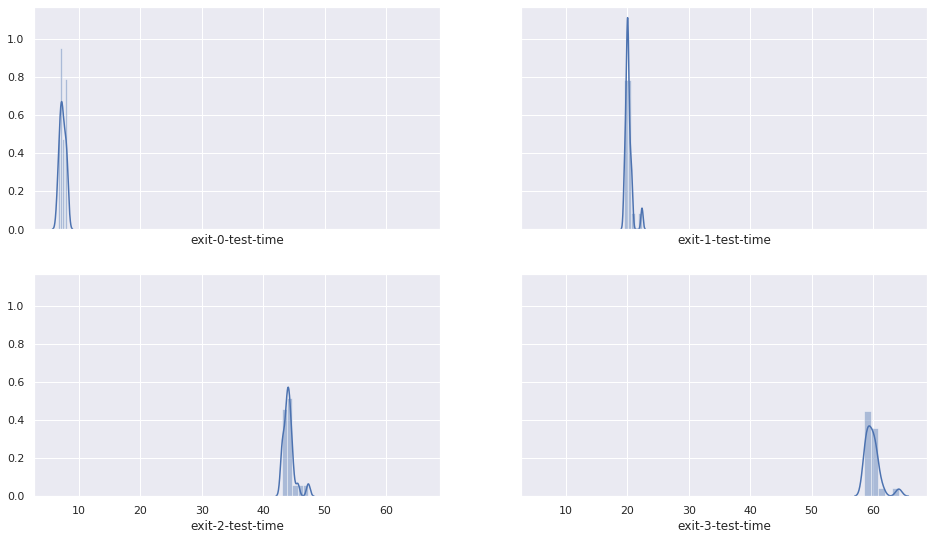

In [14]:
fig, axes = plt.subplots(2,2, figsize=(16,9),     sharex='all',
    sharey='all')
kwargs =  {'kde':True, 'hist': True, 'bins':5}
sns.distplot(test_time[0], ax=axes[0][0], **kwargs)
sns.distplot(test_time[1], ax=axes[0][1], **kwargs)
sns.distplot(test_time[2], ax=axes[1][0], **kwargs)
sns.distplot(test_time[3], ax=axes[1][1], **kwargs)
#sns.distplot(train_time[1])
#ax1 = sns.lineplot(test_time)
#ax.set(xlabel='epochs', ylabel='loss')
#plt.legend(legend)
plt.show()